# Лабораторная работа №1


In [ ]:
from typing import Tuple, Mapping
import numpy as np
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from matplotlib.animation import FuncAnimation
from IPython import display
from numpy.random import permutation
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
#набор точек
x, y = skl.datasets.make_blobs(n_samples=2, centers=None, n_features=1, random_state=0)
# приведение к одной размерности
x=np.reshape(x,y.shape)

### Функция Матьяса 
$$ f(x, y) = 0.26(x^2  +  y^2 )-0.48*x*y  $$

In [ ]:
#функция 1
def Matiasa(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Матьяса
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''

    return (np.square(x)+np.square(y))*0.26-0.48*x*y
#градиент 1
def Matiasa_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([(0.52*x-0.48*y), (0.52*y-0.48*x)]);

Matiasa(2, 3), Matiasa_Grad(2, 3)

(0.5, array([-0.4,  0.6]))

### Функция Экли
$$ f(x, y) = -20.0 * exp(-0.2*sqrt(0.5*(x^2 + y^2))) - exp(0.5 * (cos(2pi * x) + cos(2 * pi * y)))+e +20  $$

In [ ]:

def Aklu(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Экли 
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''

    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (np.square(x) +np.square(y)))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20




def Aklu_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([((np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))* np.e**((np.cos(2*np.pi*x)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*x)+(2**(3/2))*x))/(np.sqrt(np.square(x)+np.square(y)))), (np.e**(-(np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2))))*(np.pi*np.sqrt(np.square(x)+np.square(y))*np.e**((np.cos(2*np.pi*y)+1)/2+np.sqrt(np.square(x)+np.square(y))/(5*np.sqrt(2)))*np.sin(2*np.pi*y)+(2**(3/2))*y))/np.sqrt(np.square(x)+np.square(y))]);
Aklu(2, 3), Aklu_Grad(2, 3)

(7.9889108105187, array([0.94222736, 1.41334103]))

## Функция для оптимизации по 2 параметрам
$$ f(x, y) = x^2  +  y^2  $$

In [ ]:
from symbol import yield_stmt


def mu_func(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return x**2+y**2;

#градиент 1
def mu_func_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([2*x, 2*y]);


C:\Users\pacha\AppData\Local\Temp\ipykernel_18900\1950936567.py:1: DeprecationWarning: The symbol module is deprecated and will be removed in future versions of Python
  from symbol import yield_stmt


## Функция Комрика
$$ f(x, y) = sin(x + y)+(x - y)^2 - 1.5x + 2.5y +1 $$

In [ ]:
#функция 1
def McCormick(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Комрика
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2с
        
    Returns:
        np.float64: Результат функции
    '''
    return np.sin(x + y)+np.square(x - y)-1.5*x+2.5*y+1;

#градиент 1
def McCormick_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([np.cos(x+y)+2*(x-y)-1.5, np.cos(x+y)-2*(x-y)+2.5]);

McCormick(2.5, 3.4), McCormick_Grad(2.5, 3.4)

(6.186123335169764, array([-2.37252157,  5.22747843]))

## Градиентный спуск (+ Learning Rate Schedule)

In [ ]:
def my_GD_LRS(f: Mapping, df: Mapping, x: np.ndarray, y: np.ndarray, lr: float = 0.01,
          Epoch: int = 100, lre: int = 7, g: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''

    for i in range(Epoch):
        if ((i%lre)==0):
            lr *= g
        n=df(x, y)
        x = x - lr*n[0]
        y = y - lr*n[1]
        
    return x, y, f(x, y)
    

In [ ]:
my_GD_LRS(Matiasa,Matiasa_Grad,x,y,lr=0.1,lre=20)

(array([-2.80511807,  2.99997802]),
 array([3.13131252, 2.00005305]),
 array([9.70193205e-15, 4.23992343e-08]))

(array([[-1.23595228]]), array([[0.]]), array([[4.20260235]]))

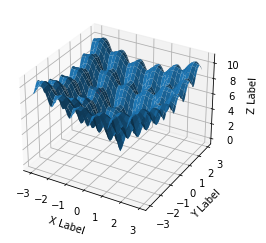

In [ ]:
#тест графика обучения GD 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Aklu(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z)

x1, y1 = skl.datasets.make_blobs(n_samples=1, centers=None, n_features=1, random_state=0)
y1=np.reshape(y1,x1.shape)

point = my_GD_LRS(Aklu, Aklu_Grad, x1, y1)

ax.scatter(point[0][0], point[1][0], point[2][0]+3, color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
point

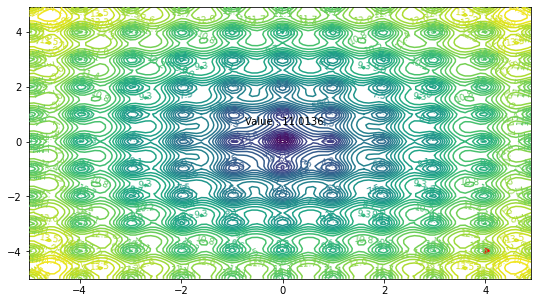

In [ ]:
from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation

# Изобразим функцию Химмельблау
grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Aklu(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)
levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

x_est = 4
y_est = -4
lr = 0.1
momentum=0.9
momentumsglaj=0.9
g=0.1
x_list = []
y_list = []

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
Epochs = 300
for i in range(Epochs):
    # графическая часть
    ax.clear()
    ax.clabel(cs, fontsize=9, inline=1)
    cs = ax.contour(X, Y, Z, 50)
    z_est = Aklu(x_est, y_est)
    ax.scatter(x_est, y_est, c="r")
    x_list.append(x_est)
    y_list.append(y_est)
    ax.plot(x_list, y_list, c="r")
    ax.text(-0.75, 0.6, "Value : %.4f" % np.double(z_est))
    # Adam
    m=np.zeros(Aklu_Grad(x_est, y_est).shape)
    Gadapt=np.zeros((Aklu_Grad(x_est, y_est)**2).shape)
    if ((i%50)==0):
        lr *= g
    m=momentum*m-lr*(1-momentum)*Aklu_Grad(x_est, y_est)
    Gadapt=momentumsglaj*Gadapt+(1-momentumsglaj)*Aklu_Grad(x_est, y_est)**2
    
    n=(lr*Aklu_Grad(x_est, y_est)*m)/(Gadapt+0.0000001)**0.5
    x_est = x_est - n[0]
    y_est = y_est - n[1]
    # x_est, y_est = x_est - Aklu_Grad(x_est, y_est)[0] * r, y_est - Aklu_Grad(x_est, y_est)[1] * r
    #plt.savefig("step{0}".format(i), bbox_inches='tight')
    
plt.show()

## GD+LRS + Momentum

In [ ]:
def my_GD_LRS_mom(f: Mapping, df: Mapping, x: np.ndarray, y: np.ndarray, lr: float = 0.1,
          Epoch: int = 100, lre: int = 7, g: float = 0.1, momentum: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Momentum.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
        momentum(float): Коэфициент сохранения момента Default = 0.9
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    n=np.zeros(df(x, y).shape)
    for i in range(Epoch):
        if ((i%lre)==0):
            lr *= g
        n=momentum*n-lr*(1-momentum)*df(x, y)
        x = x + n[0]
        y = y + n[1]
    return x, y, f(x, y)
    

In [ ]:
my_GD_LRS_mom(Matiasa,Matiasa_Grad,x,y,lr=0.1,lre=20)

(array([-2.39390117, -2.89573665]),
 array([2.92455126, 3.024034  ]),
 array([6.20466678, 0.7314802 ]))

## GD+LRS + Nestorev

In [ ]:
def my_GD_LRS_nest(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          Epoch: int = 100, lre: int = 7, g: float = 0.1, Nestorev: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Nestorev.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
        Nestorev(float): Коэфициент сохранения момента памяти для последующего шага Default = 0.9
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x = x0;
    y = y0;
    n=np.zeros(df(x, y).shape)
    for i in range(Epoch):
        if ((i%lre)==0):
            lr *= g
        n=Nestorev*n-lr*(1-Nestorev)*df(x+Nestorev*n[0]-lr*(1-Nestorev)*df(x,y)[0], y+Nestorev*n[1]-lr*(1-Nestorev)*df(x,y)[1])
        x = x + n[0]
        y = y + n[1]
        
    return x, y, f(x, y)

In [ ]:
my_GD_LRS_nest(Matiasa,Matiasa_Grad,x,y,lr=0.1,lre=20)

(array([-2.62756952,  2.98555422]),
 array([3.12058643, 2.24287351]),
 array([0.96340252, 1.05679203]))

## Adgard

In [ ]:
def my_Adgard(f: Mapping, df: Mapping, x: np.ndarray, y: np.ndarray, lr: float = 0.01,
          Epoch: int = 100, lre: int = 7, g: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Adgard.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''

    for i in range(Epoch):
        if ((i%lre)==0):
            lr *= g
        
        Gadapt=df(x, y)**2
        n=lr*df(x, y)/(Gadapt+0.0000001)**0.5
        x = x - n[0]
        y = y - n[1]
        
    return x, y, f(x, y)
    

In [ ]:
my_Adgard(Matiasa,Matiasa_Grad,x,y,lr=0.1,lre=20)

(array([-1.51427812,  5.41511271]),
 array([0.22222, 0.77778]),
 array([143.64531382, 365.81711471]))

## Adam

In [ ]:
from re import M


def my_Adam(f: Mapping, df: Mapping, x: np.ndarray, y: np.ndarray, lr: float = 0.01,
          Epoch: int = 100, lre: int = 7, g: float = 0.1, momentum: float = 0.9,momentumsglaj: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Momentum.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
        momentum (float): Коэфициент сохранения момента Default = 0.9
        momentumsglaj (float): Коэфициент сохранения момента сглаживания Default = 0.9
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    m=np.zeros(df(x, y).shape)
    Gadapt=np.zeros((df(x, y)**2).shape)
    for i in range(Epoch):
        if ((i%lre)==0):
            lr *= g
        m=momentum*m-lr*(1-momentum)*df(x, y)
        Gadapt=momentumsglaj*Gadapt+(1-momentumsglaj)*df(x, y)**2
        # if(i<100):
            # m=m/(1-momentum)
            # Gadapt=Gadapt/(1-momentumsglaj)
        n=(lr*df(x, y)*m)/(Gadapt+0.0000001)**0.5
        # print(M,Gadapt,n)
        x = x - n[0]
        y = y - n[1]
        
    return x, y, f(x, y)

In [ ]:
my_Adam(Matiasa,Matiasa_Grad,x,y,lr=0.1,lre=50,momentumsglaj=0.8,momentum=0.999)

(array([-1.28725926,  5.71271918]),
 array([0.00283712, 1.00646645]),
 array([155.91649523, 512.71851218]))

### Фунции и классы для добавления стохастичности оптимизатору ненужные в данном случае

In [ ]:
def stochastic_sample(xs, ys):
    """
        stochastic_sample: sample with replacement one x and one y
        xs: all point on the plane
        ys: all response on the plane
        
        return the one randomly selected x and y point
    """
    perm = permutation(len(xs))
    x = xs[perm[0]]
    y = ys[perm[0]]
    return x, y

class lenDataloader():
    '''бесмысленый класс для создания случайного бача из пар точек x,y созданный пока я забыл что эти точки и есть оптимизационные параметры'''
    # инициатия двухмерного датасета
    def __init__(self,x,y,batch_size: int = 1,shuffle: bool = True,drop_last: bool = False) -> None:
        self.X=x
        self.Y=y
        self.batch_size=batch_size
        self.drop_last=drop_last
        self.shuffle=shuffle
        self.batchindex=0
        self.endbatchindex=0
        self.X1=[]
        self.Y1=[]
    # отображение длины датасеета 
    def len(self) -> int:
        return len(self.X)
    # перемешивания индексов датасета если включено перемешивание иначе копируем
    def permutation(self):
        if (self.shuffle==True):
            perm = permutation(self.len)
            self.X1=[self.X[ind] for ind in perm]
            self.Y1=[self.Y[ind] for ind in perm]
        else:
            self.X1=self.X
            self.Y1=self.Y
    def ReturnPermDataset(self,indxstart:int,indxstop=None,indxstep=1):
        if indxstop==None:
            return self.X1[indxstart],self.Y1[indxstart]
        else:
            return [self.X1[indxstart:indxstop:indxstep],self.Y1[indxstart:indxstop:indxstep]]
    
    def returnBatchSet(self):
        if (self.batchindex==0):
            # инициализация доп сета для перемешивания 
            self.permutation()
            self.endbatchindex=(self.len() // self.batch_size)-1
            # если датасет не делиться на ровные батчи отбрасываем последний по флагу
            if ((self.drop_last==True) and (self.len() % self.batch_size !=0)):
                self.endbatchindex-=1
        
        if ((self.drop_last==False) and (self.len() % self.batch_size !=0)and (self.batchindex+1==self.endbatchindex)):
            batch[self.ReturnPermDataset(self.batchindex*self.batch_size, self.len())]
        else:
            batch=[self.ReturnPermDataset(self.batchindex*self.batch_size, self.batchindex*self.batch_size+self.batch_size)]
        self.batchindex+=1
        
        return batch[0],batch[1]
    def endEpoch(self):
        self.batchindex=0